# 1) Datu ielāde

In [1]:
import pandas as pd
from lvclassify_helpers import getdata10cat
	
data_news = getdata10cat()
data_news.head()

,category,body
0,Sports,Reaģējot uz Latvijas Paralimpiskās komitejas ...
1,Sports,Latvijas tenisiste Jeļena Ostapenko šodien Ķ...
2,Sports,Latvijas Sporta federāciju padome (LSFP) iebi...
3,Sports,Jaunais sporta finansējuma modelis samazinās f...
4,Sports,Aleksandrs un Mihails Samoilovi piektdien S...


# 2) Datu priekšapstrāde

## Izveidojam funkciju datu attīrīšanai - atdalošie simboli, lielie burti, palīgvārdi.

In [2]:
from lvclassify_helpers import getlvstopwords
import string
punct = string.punctuation
stopwords_arr = getlvstopwords()
print(stopwords_arr)

['aiz', 'ap', 'apakš', 'apakšpus', 'ar', 'arī', 'augšpus', 'bet', 'bez', 'bija', 'biji', 'biju', 'bijām', 'bijāt', 'būs', 'būsi', 'būsiet', 'būsim', 'būt', 'būšu', 'caur', 'diemžēl', 'diezin', 'droši', 'dēļ', 'esam', 'esat', 'esi', 'esmu', 'gan', 'gar', 'iekam', 'iekams', 'iekām', 'iekāms', 'iekš', 'iekšpus', 'ik', 'ir', 'it', 'itin', 'iz', 'ja', 'jau', 'jeb', 'jebšu', 'jel', 'jo', 'jā', 'ka', 'kamēr', 'kaut', 'kolīdz', 'kopš', 'kā', 'kļuva', 'kļuvi', 'kļuvu', 'kļuvām', 'kļuvāt', 'kļūs', 'kļūsi', 'kļūsiet', 'kļūsim', 'kļūst', 'kļūstam', 'kļūstat', 'kļūsti', 'kļūstu', 'kļūt', 'kļūšu', 'labad', 'lai', 'lejpus', 'līdz', 'līdzko', 'ne', 'nebūt', 'nedz', 'nekā', 'nevis', 'nezin', 'no', 'nu', 'nē', 'otrpus', 'pa', 'par', 'pat', 'pie', 'pirms', 'pret', 'priekš', 'pār', 'pēc', 'starp', 'tad', 'tak', 'tapi', 'taps', 'tapsi', 'tapsiet', 'tapsim', 'tapt', 'tapāt', 'tapšu', 'taču', 'te', 'tiec', 'tiek', 'tiekam', 'tiekat', 'tieku', 'tik', 'tika', 'tikai', 'tiki', 'tikko', 'tiklab', 'tiklīdz', 'tik

In [3]:
import spacy
!python -m spacy download xx_ent_wiki_sm
nlp = spacy.load("xx_ent_wiki_sm")

def datu_prieksapstrade(raksts):
  doc = nlp(raksts)
  tokens = []
  for token in doc:
    temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords_arr and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     --------------------------------------- 0.1/11.1 MB 871.5 kB/s eta 0:00:13
      --------------------------------------- 0.3/11.1 MB 2.8 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/11.1 MB 5.3 MB/s eta 0:00:02
     ------- -------------------------------- 2.0/11.1 MB 10.7 MB/s eta 0:00:01
     ------------- -------------------------- 3.7/11.1 MB 15.8 MB/s eta 0:00:01
     ------------------ --------------------- 5.1/11.1 MB 18.0 MB/s eta 0:00:01
     ----------------------- ---------------- 6.5/11.1 MB 19.7 MB/s eta 0:00:01
     ----------------------------- ---------- 8.3/11.1 MB 22.0 MB/s eta 0:00:01
     ----------------------------------- ---- 9.8/11.1 MB 23.1 MB/s eta 0:00:01
     --------------------------------------  11.1/11.1 MB 34.4 MB/s eta 0:00:01
     --------------------------------------- 11.1/11.1 MB 

In [14]:
datu_prieksapstrade("""Visvairāk atļauju (41) plānots anulēt uzņēmumam "Alfor", kam seko "Olympic Casino Latvia" ar 36 atļaujām.""")

['visvairāk',
 'atļauju',
 '41',
 'plānots',
 'anulēt',
 'uzņēmumam',
 'alfor',
 'kam',
 'seko',
 'olympic',
 'casino',
 'latvia',
 '36',
 'atļaujām',
 'tālāk']

In [4]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Dažādi vektorizācijas varianti
tfidf = TfidfVectorizer(tokenizer=datu_prieksapstrade)
count_vec = CountVectorizer(tokenizer=datu_prieksapstrade) # Countvectorizer kā BOW
count_vec_ngram = CountVectorizer(tokenizer=datu_prieksapstrade, ngram_range=(1,2)) # BOW ar ngrammām, Bag of bigrams

# 3) Modeļu apmācība / novērtēšana

## Sadalam datus 80/20

In [5]:
from sklearn.model_selection import train_test_split
x = data_news['body']
y = data_news['category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape
# 9600 apmācības dati un 2400 testa dati

((9600,), (2400,))

## Apmācības process, statistika, pārbaudes ar piemēriem

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from pathlib import Path
import pickle


def fitKlasifikatoram(vectorizer, classifier):
	clf = Pipeline([('vectorizer',vectorizer), ('classifier',classifier)])
	clf.fit(x_train, y_train)
	return clf

def metrikasIzvade(clf, title, test_vector):
	y_pred = clf.predict(test_vector)
	cm = confusion_matrix(y_test, y_pred)
	accuracy_4dig = round(accuracy_score(y_test, y_pred), 4)
	plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
	plot.plot(xticks_rotation=90)
	plot.ax_.set_title(title)
	print(classification_report(y_test, y_pred, digits=4))
	#Saglabājam cik veiksmīga bijusi klasifikācija, tabulu tālāk liksim iekš darba
	clsf_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
	filenameCsv = title + '_'+ str(accuracy_4dig) + '.csv'
	filenamePickle= title + '_'+ str(accuracy_4dig) + '.sav'
	clsf_report.to_csv(Path(".") / 'metrics1212' / filenameCsv, index= True)
	#Saglabājam modeli
	with open(Path(".") / 'models1212' / filenamePickle, 'wb') as f:
		pickle.dump(clf, f)

def fitArMetrikasIzvadi(vectorizer, classifier, title):
	clf = fitKlasifikatoram(vectorizer, classifier)
	metrikasIzvade(clf, title, x_test)

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9917    0.9958    0.9938       240
         Auto     0.9833    0.9792    0.9812       240
     Finanses     0.9569    0.9250    0.9407       240
         Kino     0.9875    0.9875    0.9875       240
Kriminālziņas     0.9916    0.9875    0.9896       240
   Literatūra     0.9792    0.9792    0.9792       240
       Mūzika     0.9793    0.9833    0.9813       240
     Politika     0.9707    0.9667    0.9687       240
       Sports     0.9796    1.0000    0.9897       240
 Tehnoloģijas     0.9180    0.9333    0.9256       240

     accuracy                         0.9738      2400
    macro avg     0.9738    0.9738    0.9737      2400
 weighted avg     0.9738    0.9738    0.9737      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9793    0.9875    0.9834       240
         Auto     0.9794    0.9917    0.9855       240
     Finanses     0.9478    0.9083    0.9277       240
         Kino     0.9915    0.9750    0.9832       240
Kriminālziņas     0.9794    0.9917    0.9855       240
   Literatūra     0.9707    0.9667    0.9687       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9620    0.9500    0.9560       240
       Sports     0.9836    1.0000    0.9917       240
 Tehnoloģijas     0.9259    0.9375    0.9317       240

     accuracy                         0.9679      2400
    macro avg     0.9679    0.9679    0.9678      2400
 weighted avg     0.9679    0.9679    0.9678      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9833    0.9833    0.9833       240
         Auto     0.9712    0.9833    0.9772       240
     Finanses     0.9649    0.9167    0.9402       240
         Kino     0.9873    0.9750    0.9811       240
Kriminālziņas     0.9876    0.9917    0.9896       240
   Literatūra     0.9707    0.9667    0.9687       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9665    0.9625    0.9645       240
       Sports     0.9877    1.0000    0.9938       240
 Tehnoloģijas     0.9190    0.9458    0.9322       240

     accuracy                         0.9696      2400
    macro avg     0.9697    0.9696    0.9695      2400
 weighted avg     0.9697    0.9696    0.9695      2400



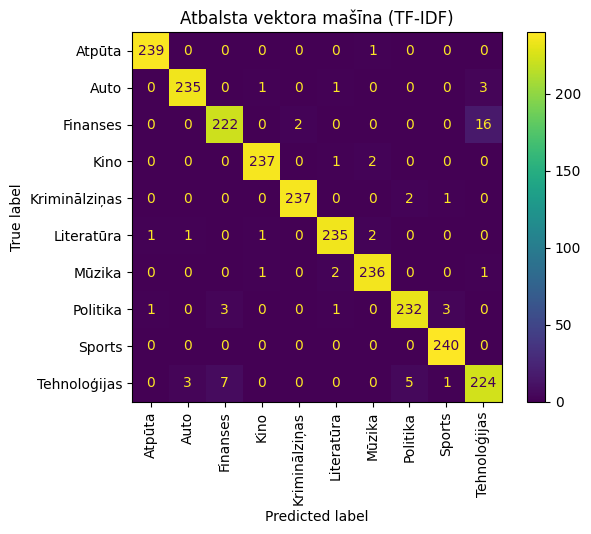

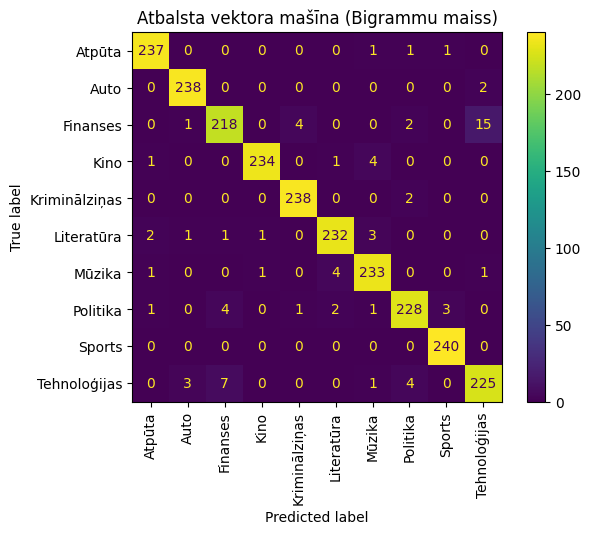

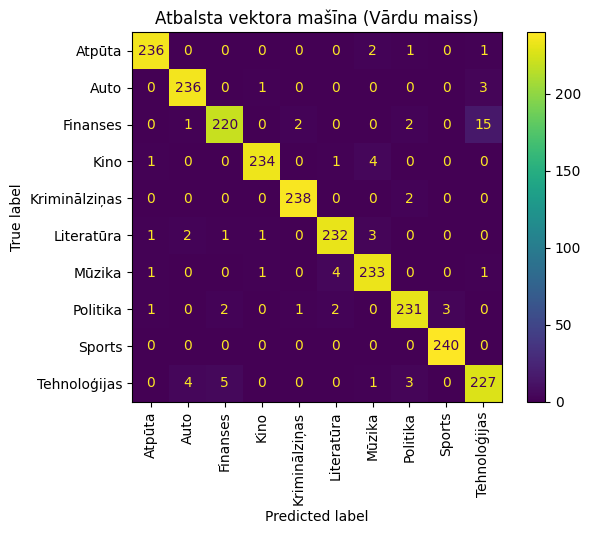

In [18]:
fitArMetrikasIzvadi(tfidf, LinearSVC(), "Atbalsta vektora mašīna (TF-IDF)")
fitArMetrikasIzvadi(count_vec_ngram, LinearSVC(), "Atbalsta vektora mašīna (Bigrammu maiss)")
fitArMetrikasIzvadi(count_vec, LinearSVC(), "Atbalsta vektora mašīna (Vārdu maiss)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9373    0.9958    0.9657       240
         Auto     0.9873    0.9750    0.9811       240
     Finanses     0.9513    0.8958    0.9227       240
         Kino     0.9755    0.9958    0.9856       240
Kriminālziņas     0.9555    0.9833    0.9692       240
   Literatūra     0.9871    0.9542    0.9703       240
       Mūzika     0.9833    0.9833    0.9833       240
     Politika     0.9243    0.9667    0.9450       240
       Sports     0.9957    0.9542    0.9745       240
 Tehnoloģijas     0.9241    0.9125    0.9182       240

     accuracy                         0.9617      2400
    macro avg     0.9621    0.9617    0.9616      2400
 weighted avg     0.9621    0.9617    0.9616      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.8691    0.9958    0.9282       240
         Auto     0.9914    0.9625    0.9767       240
     Finanses     0.9550    0.8833    0.9177       240
         Kino     0.9714    0.9917    0.9814       240
Kriminālziņas     0.9712    0.9833    0.9772       240
   Literatūra     0.9912    0.9375    0.9636       240
       Mūzika     0.9832    0.9750    0.9791       240
     Politika     0.9325    0.9792    0.9553       240
       Sports     0.9956    0.9500    0.9723       240
 Tehnoloģijas     0.9153    0.9000    0.9076       240

     accuracy                         0.9558      2400
    macro avg     0.9576    0.9558    0.9559      2400
 weighted avg     0.9576    0.9558    0.9559      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9560    0.9958    0.9755       240
         Auto     0.9916    0.9833    0.9874       240
     Finanses     0.9455    0.8667    0.9043       240
         Kino     0.9795    0.9958    0.9876       240
Kriminālziņas     0.9671    0.9792    0.9731       240
   Literatūra     0.9789    0.9667    0.9727       240
       Mūzika     0.9834    0.9875    0.9854       240
     Politika     0.9393    0.9667    0.9528       240
       Sports     0.9957    0.9625    0.9788       240
 Tehnoloģijas     0.8952    0.9250    0.9098       240

     accuracy                         0.9629      2400
    macro avg     0.9632    0.9629    0.9628      2400
 weighted avg     0.9632    0.9629    0.9628      2400



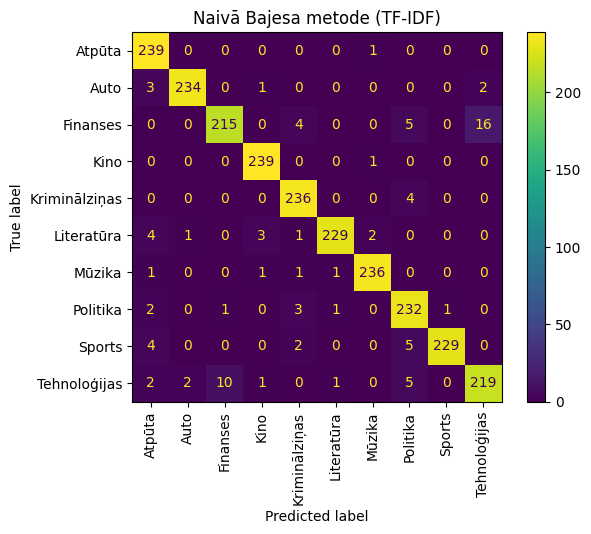

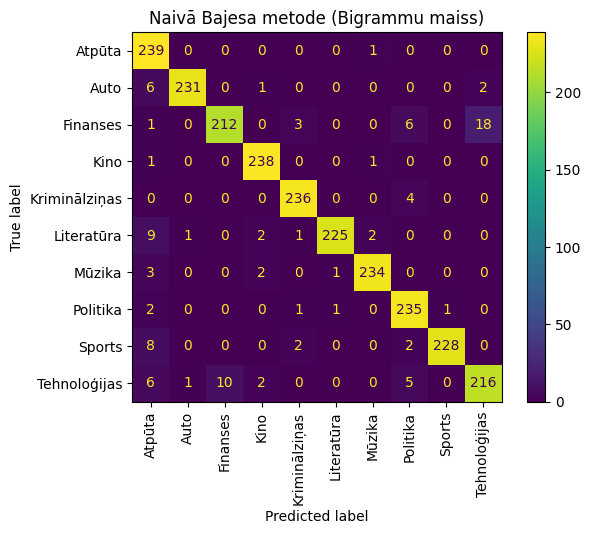

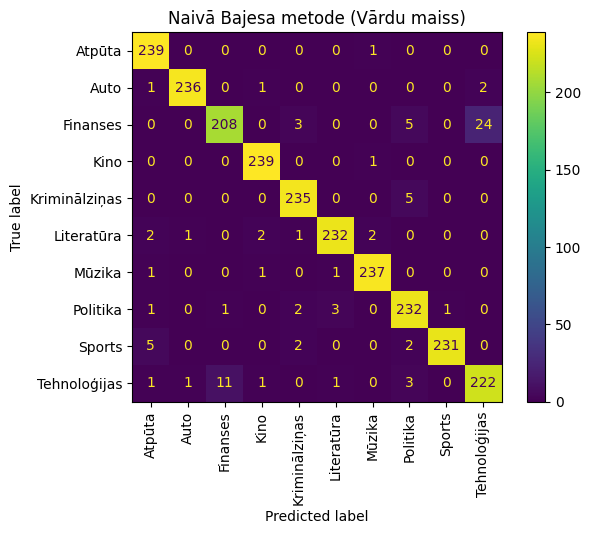

In [19]:
fitArMetrikasIzvadi(tfidf, MultinomialNB(), "Naivā Bajesa metode (TF-IDF)")
fitArMetrikasIzvadi(count_vec_ngram, MultinomialNB(), "Naivā Bajesa metode (Bigrammu maiss)")
fitArMetrikasIzvadi(count_vec, MultinomialNB(), "Naivā Bajesa metode (Vārdu maiss)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9835    0.9958    0.9896       240
         Auto     0.9875    0.9875    0.9875       240
     Finanses     0.9432    0.9000    0.9211       240
         Kino     0.9915    0.9667    0.9789       240
Kriminālziņas     0.9792    0.9792    0.9792       240
   Literatūra     0.9708    0.9708    0.9708       240
       Mūzika     0.9672    0.9833    0.9752       240
     Politika     0.9540    0.9500    0.9520       240
       Sports     0.9795    0.9958    0.9876       240
 Tehnoloģijas     0.9069    0.9333    0.9199       240

     accuracy                         0.9663      2400
    macro avg     0.9663    0.9662    0.9662      2400
 weighted avg     0.9663    0.9663    0.9662      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9793    0.9875    0.9834       240
         Auto     0.9636    0.9917    0.9774       240
     Finanses     0.9474    0.9000    0.9231       240
         Kino     0.9914    0.9625    0.9767       240
Kriminālziņas     0.9833    0.9833    0.9833       240
   Literatūra     0.9662    0.9542    0.9602       240
       Mūzika     0.9588    0.9708    0.9648       240
     Politika     0.9504    0.9583    0.9544       240
       Sports     0.9876    0.9917    0.9896       240
 Tehnoloģijas     0.9069    0.9333    0.9199       240

     accuracy                         0.9633      2400
    macro avg     0.9635    0.9633    0.9633      2400
 weighted avg     0.9635    0.9633    0.9633      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9835    0.9917    0.9876       240
         Auto     0.9713    0.9875    0.9793       240
     Finanses     0.9518    0.9042    0.9274       240
         Kino     0.9915    0.9667    0.9789       240
Kriminālziņas     0.9917    0.9917    0.9917       240
   Literatūra     0.9583    0.9583    0.9583       240
       Mūzika     0.9627    0.9667    0.9647       240
     Politika     0.9540    0.9500    0.9520       240
       Sports     0.9877    1.0000    0.9938       240
 Tehnoloģijas     0.9116    0.9458    0.9284       240

     accuracy                         0.9663      2400
    macro avg     0.9664    0.9662    0.9662      2400
 weighted avg     0.9664    0.9663    0.9662      2400



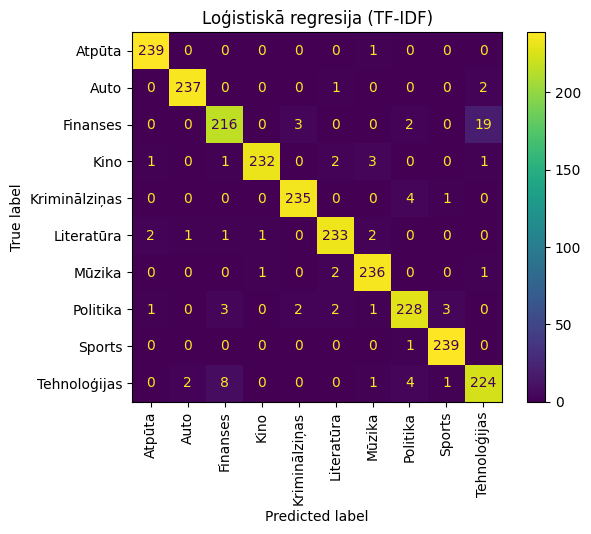

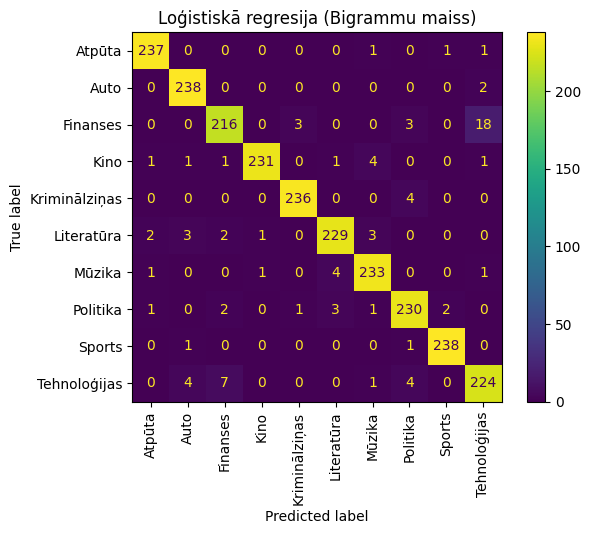

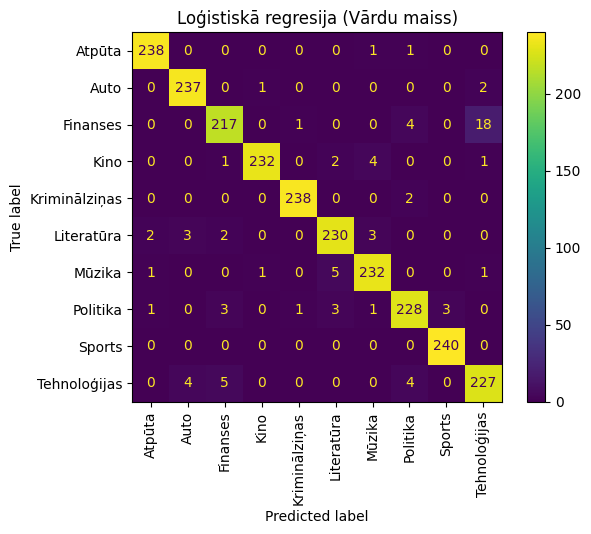

In [20]:
fitArMetrikasIzvadi(tfidf, LogisticRegression(), "Loģistiskā regresija (TF-IDF)")
fitArMetrikasIzvadi(count_vec_ngram, LogisticRegression(), "Loģistiskā regresija (Bigrammu maiss)")
fitArMetrikasIzvadi(count_vec, LogisticRegression(), "Loģistiskā regresija (Vārdu maiss)")

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7791    0.8083    0.7935       240
         Auto     0.7752    0.8333    0.8032       240
     Finanses     0.7045    0.7750    0.7381       240
         Kino     0.8996    0.8958    0.8977       240
Kriminālziņas     0.8490    0.8667    0.8577       240
   Literatūra     0.8627    0.8375    0.8499       240
       Mūzika     0.8553    0.8125    0.8333       240
     Politika     0.7511    0.7292    0.7400       240
       Sports     0.8468    0.7833    0.8139       240
 Tehnoloģijas     0.6638    0.6333    0.6482       240

     accuracy                         0.7975      2400
    macro avg     0.7987    0.7975    0.7975      2400
 weighted avg     0.7987    0.7975    0.7975      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7899    0.7833    0.7866       240
         Auto     0.7885    0.8542    0.8200       240
     Finanses     0.7692    0.7917    0.7803       240
         Kino     0.9532    0.9333    0.9432       240
Kriminālziņas     0.8966    0.8667    0.8814       240
   Literatūra     0.8543    0.8792    0.8665       240
       Mūzika     0.8449    0.8625    0.8536       240
     Politika     0.7615    0.7583    0.7599       240
       Sports     0.8383    0.8208    0.8295       240
 Tehnoloģijas     0.6982    0.6458    0.6710       240

     accuracy                         0.8196      2400
    macro avg     0.8195    0.8196    0.8192      2400
 weighted avg     0.8195    0.8196    0.8192      2400



c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.7946    0.7417    0.7672       240
         Auto     0.7707    0.8542    0.8103       240
     Finanses     0.7563    0.7500    0.7531       240
         Kino     0.9412    0.9333    0.9372       240
Kriminālziņas     0.8875    0.8875    0.8875       240
   Literatūra     0.8664    0.8375    0.8517       240
       Mūzika     0.8333    0.8542    0.8436       240
     Politika     0.7593    0.7625    0.7609       240
       Sports     0.8390    0.8250    0.8319       240
 Tehnoloģijas     0.6527    0.6500    0.6514       240

     accuracy                         0.8096      2400
    macro avg     0.8101    0.8096    0.8095      2400
 weighted avg     0.8101    0.8096    0.8095      2400



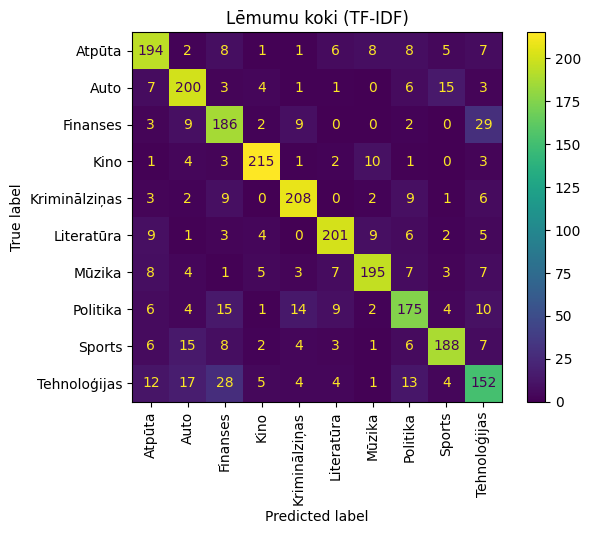

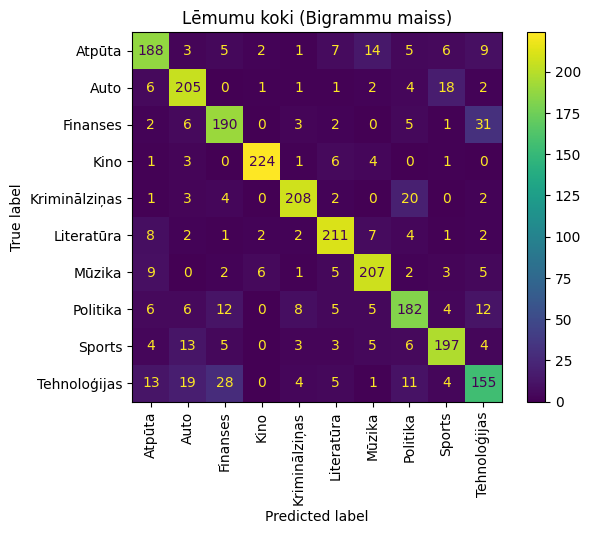

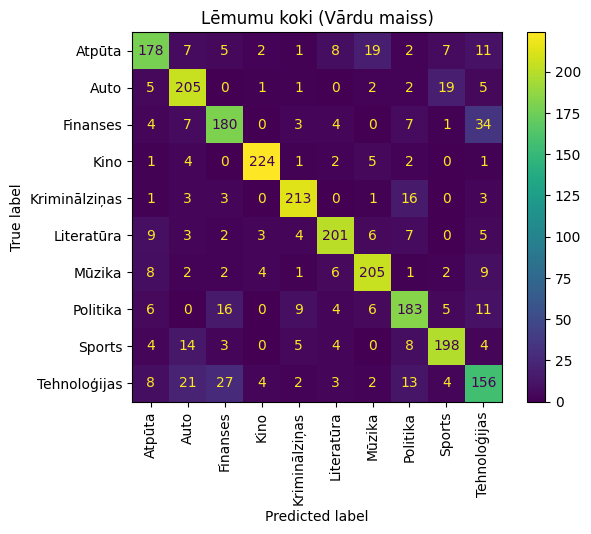

In [21]:
fitArMetrikasIzvadi(tfidf, DecisionTreeClassifier(), "Lēmumu koki (TF-IDF)")
fitArMetrikasIzvadi(count_vec_ngram, DecisionTreeClassifier(), "Lēmumu koki (Bigrammu maiss)")
fitArMetrikasIzvadi(count_vec, DecisionTreeClassifier(), "Lēmumu koki (Vārdu maiss)")

In [22]:
# Sporta raksts
fittedSVC = pickle.load(open("models/Atbalsta vektora mašīna (TF-IDF)_0.9738.sav", 'rb'))
fittedSVC.predict(["""Latvijas basketbola izlase otrdien Džakartā ar smagu zaudējumu piedzīvoja pirmo zaudējumu Pasaules kausa vēsturē, H grupas pēdējās kārtas spēlē ar 75:101 (23:13, 19:30, 15:24, 18:34) piekāpjoties teicami otro puslaiku aizvadījušajai Kanādai.

Latvija uzvarēja pirmo ceturtdaļu ar 10 punktu pārsvaru, bet atlikušajās 30 minūtēs piekāpās ar 52:88. Pēc pirmā puslaika Latvijai bija viena punkta deficīts, bet otro puslaiku Latvija zaudēja ar 33:58."""])

array(['Sports'], dtype=object)

In [23]:
# Politikas raksts
fittedSVC.predict(["""Lēmumi par kontrolpunktu slēgšanu uz Lietuvas robežas ar Baltkrieviju tiks pieņemti, ja tiks konstatēts apdraudējums, kas atbildīs kritērijiem, ko noteiks starpinstitūciju darba grupa, otrdien paziņoja Lietuvas iekšlietu viceministrs Vitālijs Dmitrijevs.

"Vienojāmies, ka, lai turpinātu slēgt robežkontroles punktus vai ierobežotu to darbību, nosakot noteiktas stundas, lai kontrolpunkts, piemēram, strādātu līdz pulksten 20 vai pulksten 18, acīmredzot ir nepieciešams visu kopīgs viedoklis," pēc vairāku ministriju, robežsardzes un citu dienestu pārstāvju tikšanās aģentūrai BNS sacīja Dmitrijevs."""])

array(['Kriminālziņas'], dtype=object)

# FastText vektorizācija priekšapstrādē

In [7]:
from gensim.models import fasttext
import numpy as np

model = fasttext.load_facebook_vectors('cc.lv.300.bin.gz')

In [11]:
def get_embedding(word):
    try:
        embedding=model[word]
    except:
        embedding=np.zeros((300,))
    return embedding
x_train_fasttext = x_train.apply(datu_prieksapstrade)
x_test_fasttext = x_test.apply(datu_prieksapstrade)


x_train_fasttext=[np.mean(np.array(list(map(get_embedding,tok_sent))),axis=0) for tok_sent in x_train_fasttext]
x_test_fasttext=[np.mean(np.array(list(map(get_embedding,tok_sent))),axis=0) for tok_sent in x_test_fasttext]

In [12]:
from sklearn.preprocessing import MinMaxScaler
#Normalization
scaler = MinMaxScaler()   
x_train_fasttext = scaler.fit_transform(x_train_fasttext) 
x_test_fasttext = scaler.transform(x_test_fasttext) 

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


               precision    recall  f1-score   support

       Atpūta     0.9597    0.9917    0.9754       240
         Auto     0.9440    0.9833    0.9633       240
     Finanses     0.9217    0.8833    0.9021       240
         Kino     0.9875    0.9875    0.9875       240
Kriminālziņas     0.9555    0.9833    0.9692       240
   Literatūra     0.9748    0.9667    0.9707       240
       Mūzika     0.9669    0.9750    0.9710       240
     Politika     0.9609    0.9208    0.9404       240
       Sports     0.9873    0.9750    0.9811       240
 Tehnoloģijas     0.9076    0.9000    0.9038       240

     accuracy                         0.9567      2400
    macro avg     0.9566    0.9567    0.9564      2400
 weighted avg     0.9566    0.9567    0.9564      2400



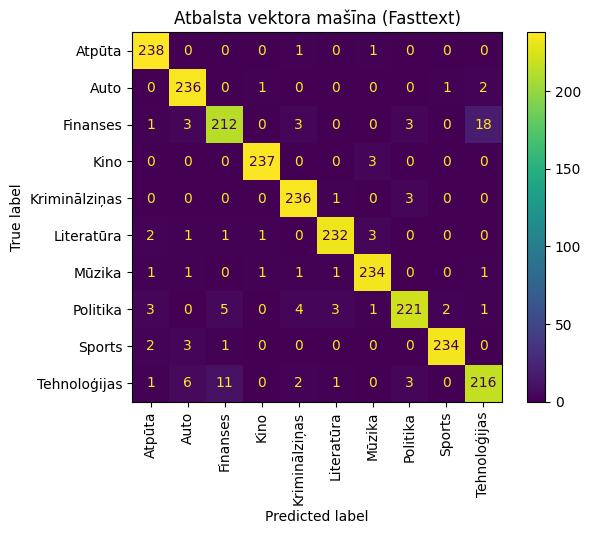

In [13]:
clfSVC = LinearSVC()
clfSVC.fit(x_train_fasttext, y_train)        
metrikasIzvade(clfSVC, "Atbalsta vektora mašīna (Fasttext)", x_test_fasttext)

               precision    recall  f1-score   support

       Atpūta     0.9055    0.9583    0.9312       240
         Auto     0.9006    0.6042    0.7232       240
     Finanses     0.8350    0.7167    0.7713       240
         Kino     0.9690    0.9125    0.9399       240
Kriminālziņas     0.9397    0.9083    0.9237       240
   Literatūra     0.8561    0.9417    0.8968       240
       Mūzika     0.9559    0.9042    0.9293       240
     Politika     0.7379    0.8917    0.8075       240
       Sports     0.7419    0.8625    0.7977       240
 Tehnoloģijas     0.7356    0.8000    0.7665       240

     accuracy                         0.8500      2400
    macro avg     0.8577    0.8500    0.8487      2400
 weighted avg     0.8577    0.8500    0.8487      2400



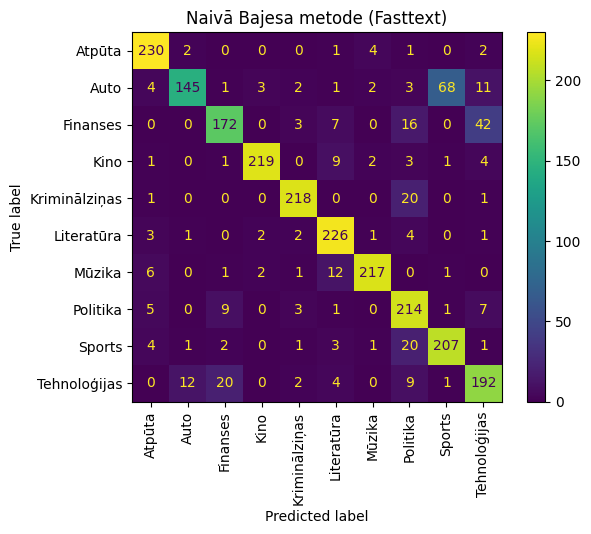

In [19]:
clfNB = MultinomialNB()
clfNB.fit(x_train_fasttext, y_train)    
metrikasIzvade(clfNB , "Naivā Bajesa metode (Fasttext)", x_test_fasttext)

               precision    recall  f1-score   support

       Atpūta     0.7967    0.8167    0.8066       240
         Auto     0.6898    0.7042    0.6969       240
     Finanses     0.7313    0.6917    0.7109       240
         Kino     0.7611    0.7833    0.7721       240
Kriminālziņas     0.8067    0.8000    0.8033       240
   Literatūra     0.8018    0.7583    0.7794       240
       Mūzika     0.7314    0.7375    0.7344       240
     Politika     0.7266    0.7750    0.7500       240
       Sports     0.7490    0.7583    0.7536       240
 Tehnoloģijas     0.6114    0.5833    0.5970       240

     accuracy                         0.7408      2400
    macro avg     0.7406    0.7408    0.7404      2400
 weighted avg     0.7406    0.7408    0.7404      2400



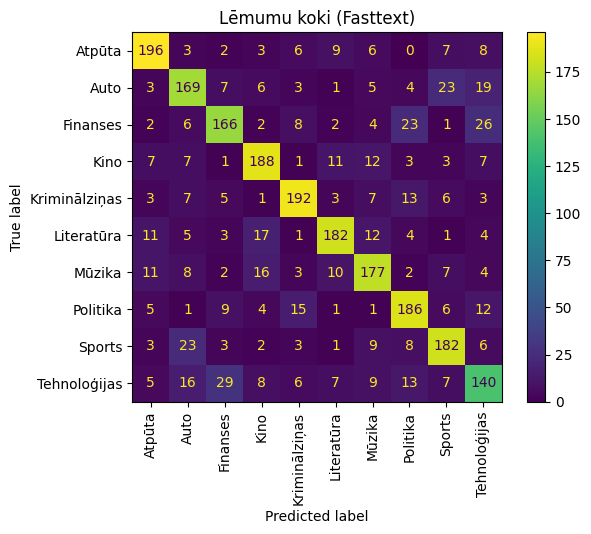

In [20]:
clfLemKok = DecisionTreeClassifier()
clfLemKok.fit(x_train_fasttext, y_train)        
metrikasIzvade(clfLemKok , "Lēmumu koki (Fasttext)", x_test_fasttext)

c:\Users\Devtop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

       Atpūta     0.9636    0.9917    0.9774       240
         Auto     0.9792    0.9792    0.9792       240
     Finanses     0.9188    0.8958    0.9072       240
         Kino     0.9916    0.9833    0.9874       240
Kriminālziņas     0.9710    0.9750    0.9730       240
   Literatūra     0.9789    0.9667    0.9727       240
       Mūzika     0.9711    0.9792    0.9751       240
     Politika     0.9253    0.9292    0.9272       240
       Sports     0.9830    0.9625    0.9726       240
 Tehnoloģijas     0.8980    0.9167    0.9072       240

     accuracy                         0.9579      2400
    macro avg     0.9580    0.9579    0.9579      2400
 weighted avg     0.9580    0.9579    0.9579      2400



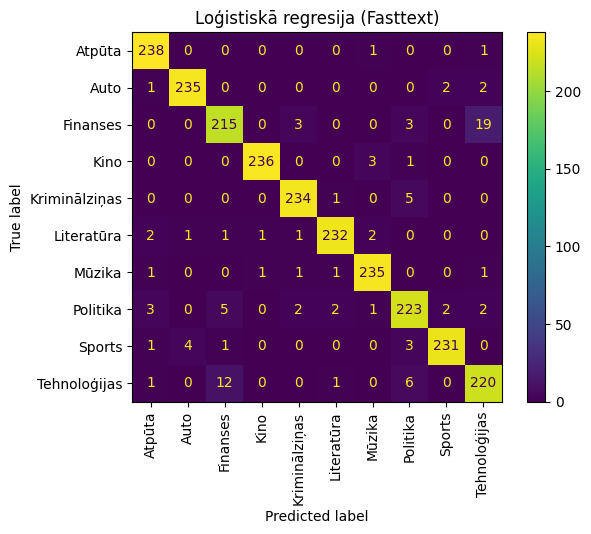

In [21]:
clfLogReg = LogisticRegression()
clfLogReg.fit(x_train_fasttext, y_train)        
metrikasIzvade(clfLogReg , "Loģistiskā regresija (Fasttext)", x_test_fasttext)